# 1. Load data and packages

In [ ]:
#load packages
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from google.colab import drive
np.random.seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/DataLynn/heart_disease/HeartDisease.csv"
df = pd.read_csv(data_path)

# 2. Data Inspection and Manipulation

In [ ]:
df.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


1    526
0    499
Name: target, dtype: int64

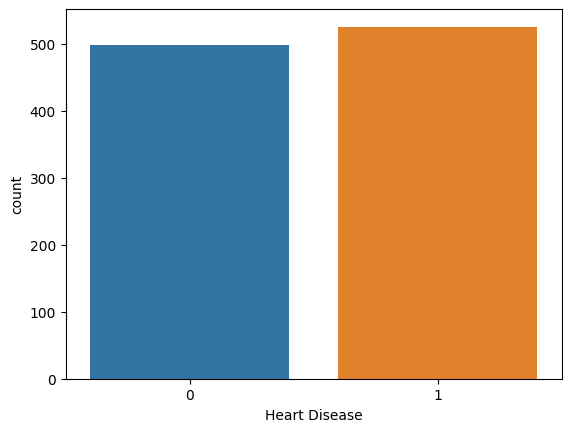

In [ ]:
# Inbalance check
# This is a binary classification problem with relatively balanced data, we could use ROC-AUC score to evaluate the model performance

sns.countplot(data= df, x="target")
plt.xlabel("Heart Disease")
df["target"].value_counts()

## 2.1 Missing Value

In [ ]:
#Missing value inspection
df1 = df.copy()
print(df.isnull().sum()/df.shape[1])

age                              0.0
sex                              0.0
chest_pain_type                  0.0
resting_blood_pressure           0.0
cholestoral                      0.0
fasting_blood_sugar              0.0
rest_ecg                         0.0
Max_heart_rate                   0.0
exercise_induced_angina          0.0
oldpeak                          0.0
slope                            0.0
vessels_colored_by_flourosopy    0.0
thalassemia                      0.0
target                           0.0
dtype: float64


## 2.2 Primary Data Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Creating a label encoder object
le = LabelEncoder()

# Label Encoding for ordinal features
df['slope'] = le.fit_transform(df['slope'])
df['vessels_colored_by_flourosopy'] = le.fit_transform(df['vessels_colored_by_flourosopy'])
df['fasting_blood_sugar'] = le.fit_transform(df['fasting_blood_sugar'])
df['rest_ecg'] = le.fit_transform(df['rest_ecg'])

# One-hot Encoding for nominal features
ohe_cols = ['chest_pain_type', 'exercise_induced_angina', 'thalassemia','sex']
df = pd.get_dummies(df, columns = ohe_cols)


<Axes: >

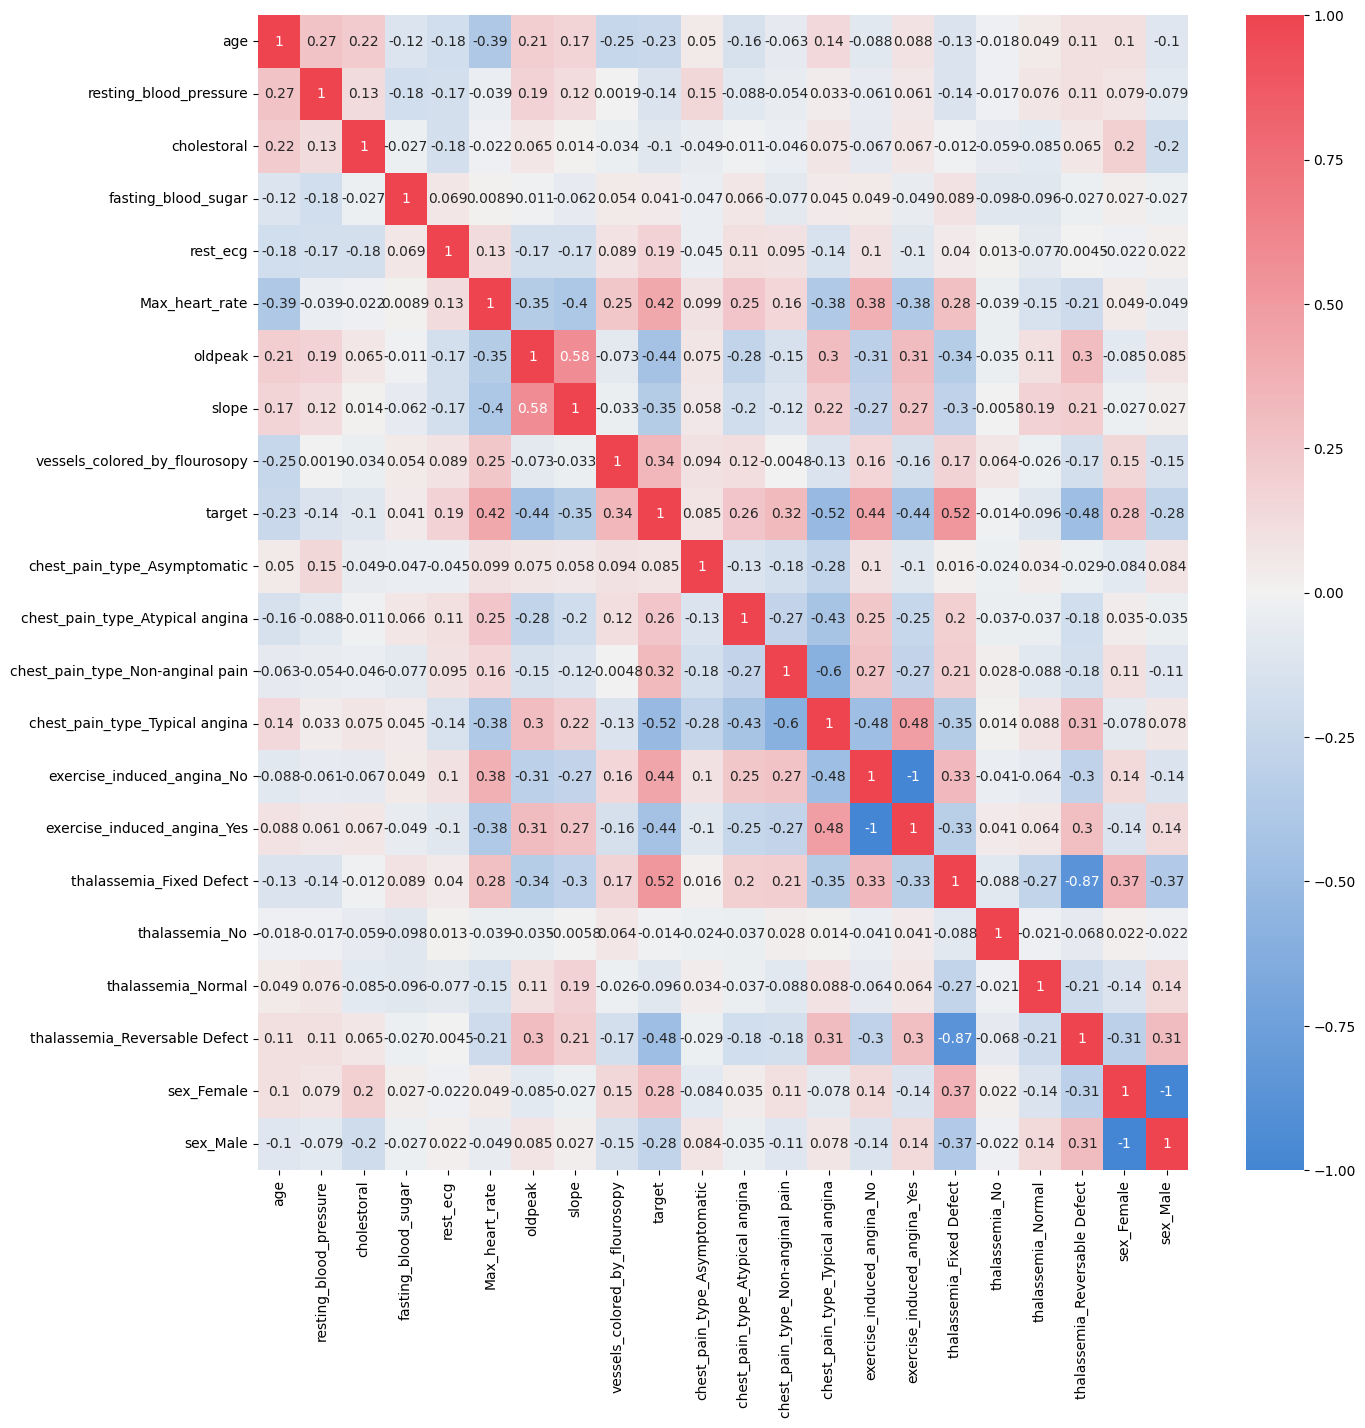

In [ ]:
#independent variable correlation check
corrmat= df.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

# 3. Benchmark Modeling

In [ ]:
# Data preparation for training models:

# 1. Assigning values to features as X and target as y
X_df=df.drop(["target"],axis=1)
y=df["target"]
#2. Standarization data to  have zero mean and unit variance
# standarization data
col_names = list(X_df.columns)
s_scaler = preprocessing.StandardScaler()
X= s_scaler.fit_transform(X_df)
X = pd.DataFrame(X, columns=col_names)

In [ ]:
#Spliting test and training sets
X_train_val, X_test, y_train_val,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, x_valid, y_train, y_valid = train_test_split(X_train_val,y_train_val,test_size = 0.1,random_state=42)

In [ ]:
# Logistic regression is used as the benchmark model
from sklearn.metrics import roc_auc_score

pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])


# List of all the pipelines
pipelines = pipeline_lr

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Evaluate on ROC-AUC
for i, model in enumerate(pipelines):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome only
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC for %s: %.2f" % (pipe_dict[i], auc_roc))

ROC-AUC for Logistic Regression: 0.89


# 4. Feature Engineer

In [ ]:

df = df1

# Encoding sex feature
encoder = OneHotEncoder(sparse=False, drop='first') # drop='first' to avoid multicollinearity
sex_encoded = encoder.fit_transform(df[['sex']])
# Manually generate feature names
feature_names = ['sex_' + str(cat) for cat in encoder.categories_[0][1:]]  # drop the first category same as drop='first'
sex_encoded_df = pd.DataFrame(sex_encoded, columns=feature_names)

#Concatenate the original dataframe with the one-hot encoded dataframe
df = pd.concat([df, sex_encoded_df], axis=1)




# Cholesterol
def chol_level(x):
    if x > 240:
        return 2 #high
    elif x > 200:
        return 1 #medium (borderline high)
    else:
        return 0 #desirable
df['cholestoral_level'] = df['cholestoral'].apply(chol_level)


#'sex_chol': This is a new feature that interacts 'sex' and 'chol'. It's plausible that the effect of cholesterol level on heart disease may differ by sex.
# Creating a new interaction feature 'sex_chol' between 'sex' and 'chol'
for col in sex_encoded_df.columns:
    df[f'{col}_chol_interaction'] = df[col] * df['cholestoral']

#'bp_cat': This is a categorical feature derived from 'trestbps' (resting blood pressure). We can have categories like 'Low', 'Normal', 'High'. It may help to capture the effect of different blood pressure levels on heart disease.
# Creating a new feature 'bp_cat' based on 'resting_blood_pressure'
df['bp_cat'] = pd.cut(df['resting_blood_pressure'], bins=[0, 120, 140, 160, 200], labels=['Low', 'Normal', 'High', 'Very High'])

#'age_sex': This is an interaction between 'age' and 'sex'. The risk of heart disease can vary across different age groups for different sexes.
# Creating a new interaction feature 'age_sex' between 'age' and 'sex'
for col in sex_encoded_df.columns:
    df[f'{col}_age_interaction'] = df[col] * df['age']

#'age_chol': This is an interaction feature between 'age' and 'chol'. The effect of cholesterol level on heart disease may change as a person gets older.
# Creating a new interaction feature 'age_chol' between 'age' and 'chol'
df['age_chol'] = df['age'] * df['cholestoral']


# 6. Max Heart Rate Level
df['Max_hr_level'] = pd.cut(df['Max_heart_rate'], bins=[0, 100, 150, np.inf], labels=['Low', 'Medium', 'High'])


#Combined Risk Score: We could also create a score feature that combines some of the risk factors.
df['risk_score'] = df['age']/max(df['age']) + df['cholestoral']/max(df['cholestoral']) + df['resting_blood_pressure']/max(df['resting_blood_pressure']) + df['oldpeak']/max(df['oldpeak'])




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# re-showcase the data with new features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1025 non-null   int64   
 1   sex                            1025 non-null   object  
 2   chest_pain_type                1025 non-null   object  
 3   resting_blood_pressure         1025 non-null   int64   
 4   cholestoral                    1025 non-null   int64   
 5   fasting_blood_sugar            1025 non-null   object  
 6   rest_ecg                       1025 non-null   object  
 7   Max_heart_rate                 1025 non-null   int64   
 8   exercise_induced_angina        1025 non-null   object  
 9   oldpeak                        1025 non-null   float64 
 10  slope                          1025 non-null   object  
 11  vessels_colored_by_flourosopy  1025 non-null   object  
 12  thalassemia                    102

In [ ]:
# Encoding new features

# Creating a label encoder object
le = LabelEncoder()

# Label Encoding for new ordinal features
df['Max_hr_level'] = le.fit_transform(df['Max_hr_level'])
df['bp_cat'] = le.fit_transform(df['bp_cat'])


# Label Encoding for old ordinal features
df['slope'] = le.fit_transform(df['slope'])
df['vessels_colored_by_flourosopy'] = le.fit_transform(df['vessels_colored_by_flourosopy'])
df['fasting_blood_sugar'] = le.fit_transform(df['fasting_blood_sugar'])
df['rest_ecg'] = le.fit_transform(df['rest_ecg'])

# One-hot Encoding for old nominal features
ohe_cols = ['chest_pain_type', 'exercise_induced_angina', 'thalassemia']
df = pd.get_dummies(df, columns = ohe_cols)

df = df.drop('sex', axis=1)

<Axes: >

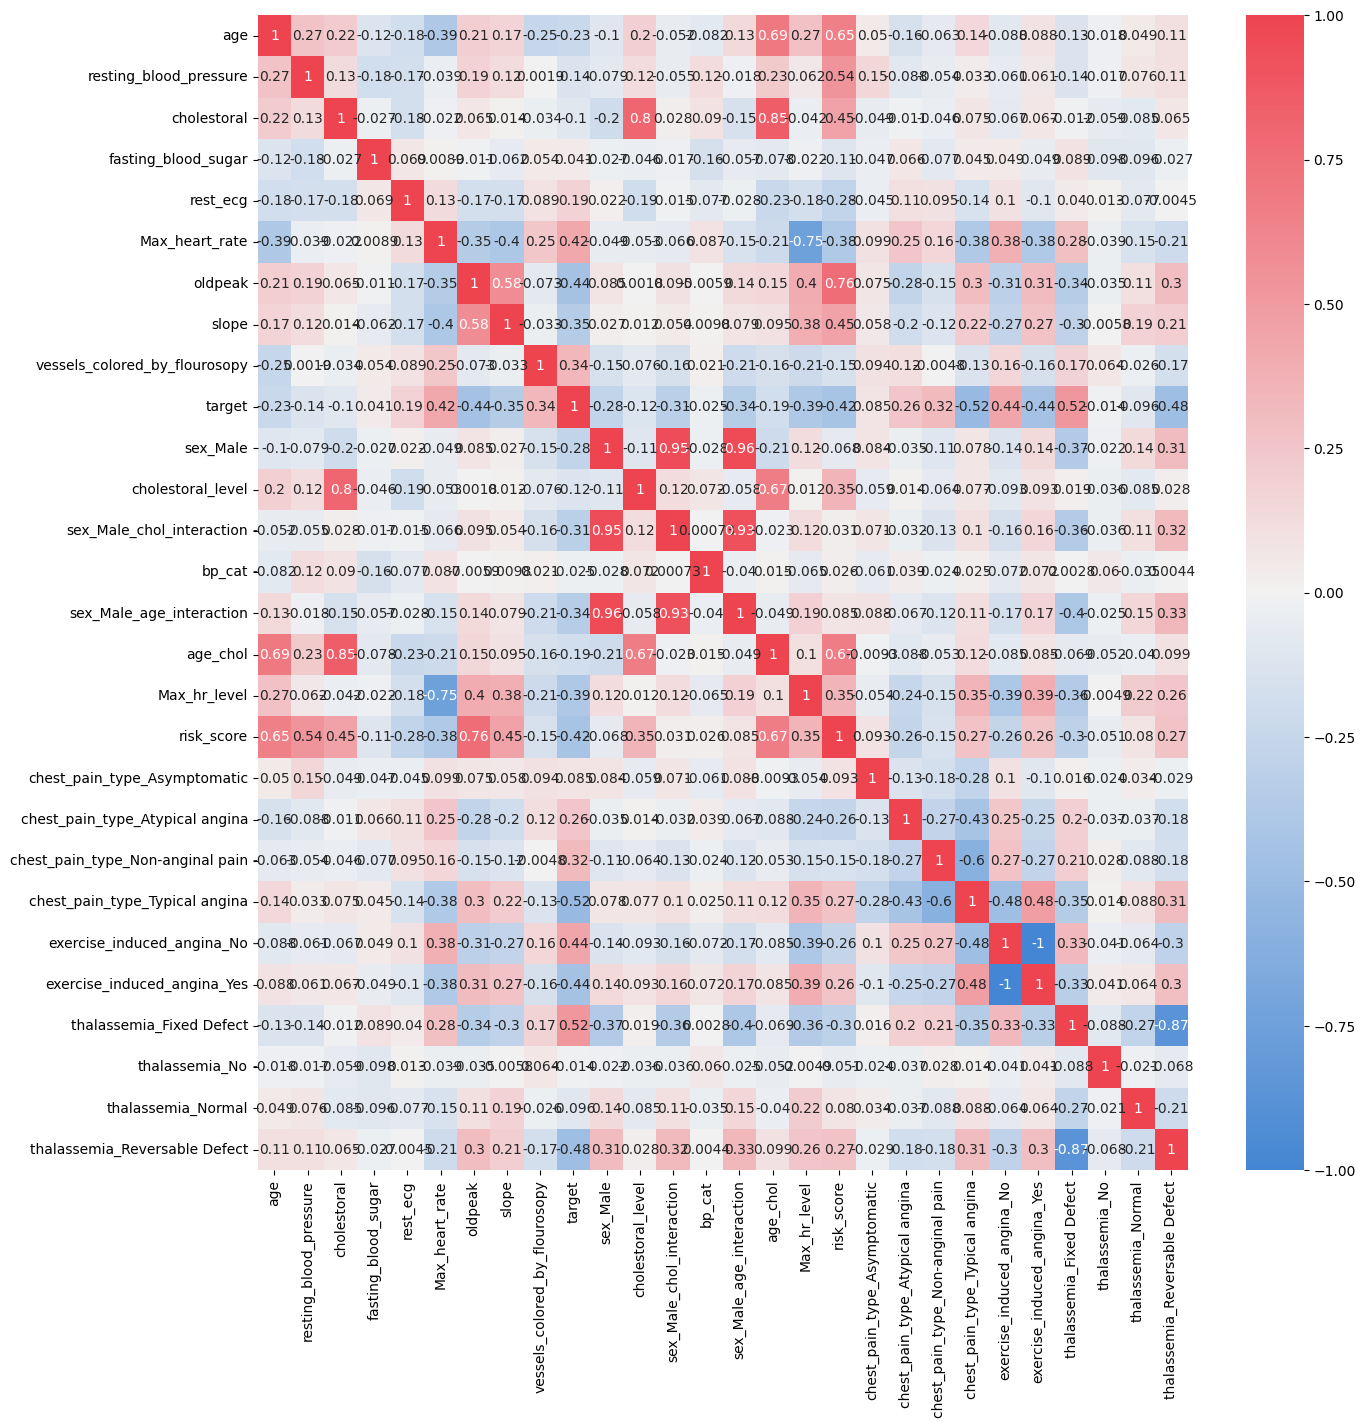

In [ ]:
# Colinearity and correlation check
# check the data for highly correlated features. We could see that there are several features have high correlation.
corrmat= df.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
#Apply VIF check for the collinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term to the features, as the VIF method expects it
X_const = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(len(X_const.columns))]

print(vif_data)

                             feature        VIF
0                              const   0.000000
1                                age        inf
2             resting_blood_pressure        inf
3                        cholestoral        inf
4                fasting_blood_sugar   1.129952
5                           rest_ecg   1.165621
6                     Max_heart_rate   2.852543
7                            oldpeak        inf
8                              slope   1.733909
9      vessels_colored_by_flourosopy   1.275893
10                            target   2.206856
11                          sex_Male  55.104444
12                 cholestoral_level   3.788505
13         sex_Male_chol_interaction  28.298541
14                            bp_cat   1.104268
15          sex_Male_age_interaction  40.140486
16                          age_chol  92.633777
17                      Max_hr_level   2.678027
18                        risk_score        inf
19      chest_pain_type_Asymptomatic    

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


#5. Benchmark Model on Data with Feature Engineering

In [ ]:
#Data preparation for training models:
#assigning values to features as X and target as y
X_df=df.drop(["target"],axis=1)
y=df["target"]

In [ ]:
# standarization data
col_names = list(X_df.columns)
s_scaler = preprocessing.StandardScaler()
X= s_scaler.fit_transform(X_df)
X = pd.DataFrame(X, columns=col_names)

In [ ]:
#spliting test and training sets
X_train_val, X_test, y_train_val,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, x_valid, y_train, y_valid = train_test_split(X_train_val,y_train_val,test_size = 0.1,random_state=42)

In [ ]:
X_train.head(3)

,age,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,oldpeak,slope,vessels_colored_by_flourosopy,sex_Male,...,chest_pain_type_Asymptomatic,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,exercise_induced_angina_No,exercise_induced_angina_Yes,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
89,1.496036,0.707572,-1.027782,-2.387330,0.973266,-0.352873,1.982569,0.624121,-0.002264,0.661504,...,-0.284998,-0.441179,-0.619085,1.030715,0.712287,-0.712287,-1.063474,-0.082923,-0.258065,1.224745
511,-1.260953,-0.663216,-1.338056,0.418878,-0.919709,-1.266135,1.216273,0.624121,0.771279,0.661504,...,-0.284998,-0.441179,-0.619085,1.030715,-1.403928,1.403928,-1.063474,-0.082923,-0.258065,1.224745
175,0.172682,3.906079,0.814469,-2.387330,-0.919709,-0.700783,2.493434,2.243675,-0.002264,-1.511706,...,-0.284998,-0.441179,-0.619085,1.030715,-1.403928,1.403928,-1.063474,-0.082923,-0.258065,1.224745


In [ ]:
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])


# List of all the pipelines
pipelines = pipeline_lr

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Evaluate on ROC-AUC
for i, model in enumerate(pipelines):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome only
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC for %s: %.2f" % (pipe_dict[i], auc_roc))

ROC-AUC for Logistic Regression: 0.89


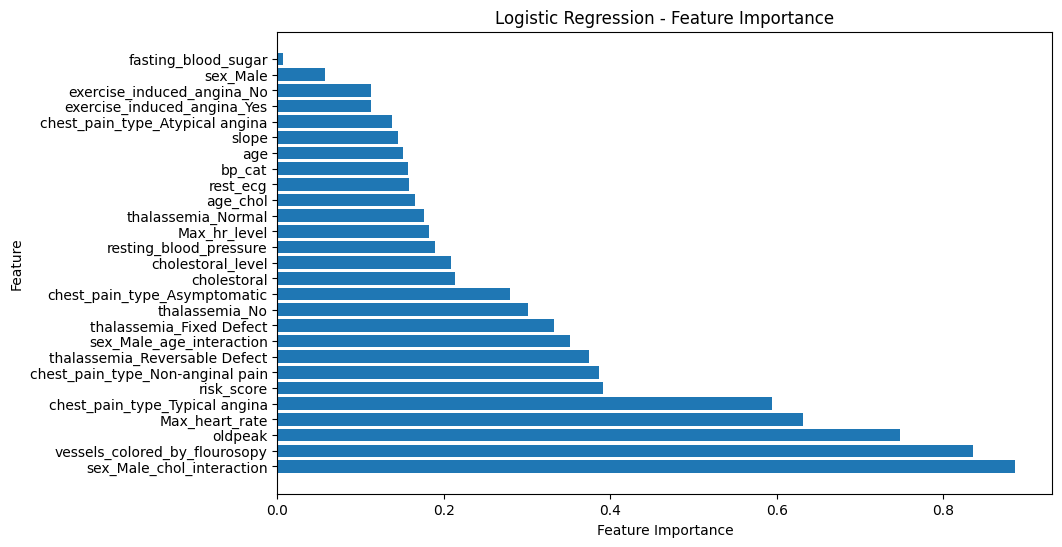

In [ ]:
# visualize the feature importance of the logistic regression model we just trained

# Get the feature importance (absolute values of coefficients)
feature_importance = np.abs(pipeline_lr.named_steps['lr_classifier'].coef_[0])

# Get the feature names
feature_names = X.columns  # Replace X with your feature dataframe or array

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Logistic Regression - Feature Importance")
plt.show()

# 6. Feature Selection with Lasso Regularization

In [ ]:
pipeline_lr = Pipeline([
    ('lr_classifier', LogisticRegression(penalty='l1',C =  0.23357214690901212,
                                         solver='liblinear', random_state=42))
])


# List of all the pipelines
pipelines = [pipeline_lr]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression'}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#ROC-AUC score
for i, model in enumerate(pipelines):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome only
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC for L1-Regularized Logistic Regression: %.2f" % auc_roc)

ROC-AUC for L1-Regularized Logistic Regression: 0.89


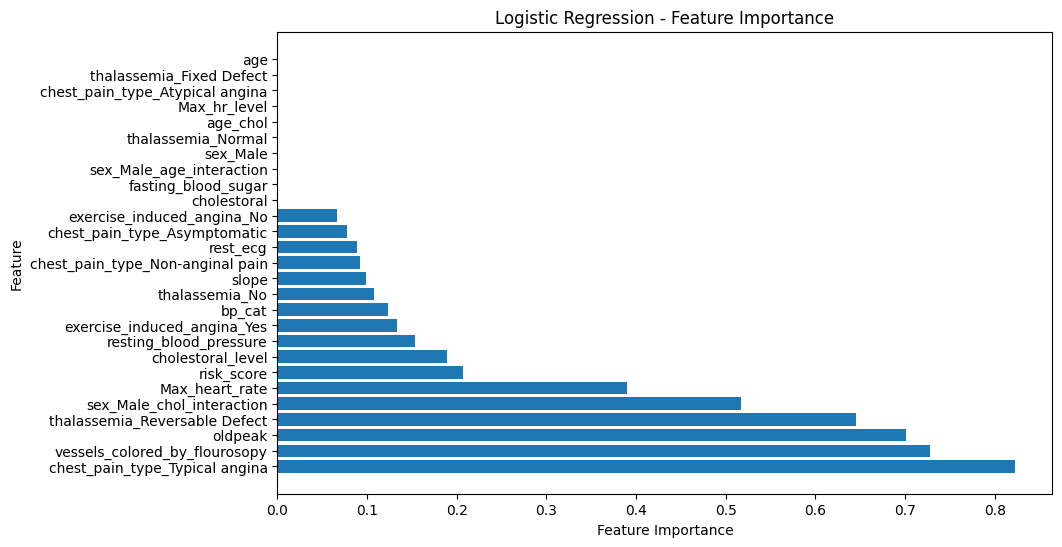

In [ ]:
# visualize the feature importance of the l-1 regularized logistic regression model we just trained

# Get the feature importance (absolute values of coefficients)
feature_importance = np.abs(pipeline_lr.named_steps['lr_classifier'].coef_[0])

# Get the feature names
feature_names = X.columns  # Replace X with your feature dataframe or array

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Logistic Regression - Feature Importance")
plt.show()

# 7. Dimensionality reduction with non-linear dimension reduction method (UMAP)

In [ ]:
!pip install umap-learn

In [ ]:
import umap

# range of components to try
n_components_range = range(1, 20)

# list to store average cross-validated scores for each number of components
average_scores = []

for n_components in n_components_range:
    reducer = umap.UMAP(n_components=n_components)
    X_reduced = reducer.fit_transform(X_train)

    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X_reduced, y_train, cv=5)
    average_scores.append(np.mean(scores))

# find number of components that gave highest average score
best_n_components = n_components_range[np.argmax(average_scores)]
print('The best n component for UMAP %.2f' %(best_n_components))

The best n component for UMAP 17.00


In [ ]:
import umap

# Create a umap object
umap = umap.UMAP(n_components=17)   # n_components should be less than or equal to the number of features in X

# Create a Logistic Regression object
lr = LogisticRegression(max_iter =1000,random_state=42)

# Create a pipeline with umap and Logistic Regression
pipeline_lr = Pipeline(steps=[('umap', umap), ('lr_classifier', lr)])

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Use the pipeline to predict probabilities for the test data
y_pred_proba = pipeline_lr.predict_proba(X_test)[:, 1]

# Calculate and print ROC-AUC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC for Logistic Regression with UMAP: %.2f" % (auc_roc))




ROC-AUC for Logistic Regression with UMAP: 0.94


# 8. Model Enhancement

## 8.1 Model Enhancement - SVC

In [ ]:
# Create the pipeline
pipeline_svc = Pipeline(steps=[
    ('umap', umap),
    # ('scaler', StandardScaler()),  # Optional: Standardize the features
    ('svc_classifier', SVC(probability=True))
])

# Fit the pipeline
pipeline_svc.fit(X_train, y_train)

# Predict probabilities and calculate ROC-AUC
y_pred_proba = pipeline_svc.predict_proba(X_test)[:, 1]  # Probabilities for the positive outcome only
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC for SVC: %.2f" % auc_roc)

ROC-AUC for SVC: 0.96


##8.2 Model Enhancement - KNN

In [ ]:
knn = KNeighborsClassifier()

pipeline_knn = Pipeline(steps=[
    ('umap', umap),
    # ('scaler', StandardScaler()),  # Optional: Standardize the features
    ('knn', knn)
])

# Fit the pipeline
pipeline_knn.fit(X_train, y_train)

# Predict probabilities and calculate ROC-AUC
y_pred_proba = pipeline_knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive outcome only
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC for KNN: %.2f" % auc_roc)


ROC-AUC for KNN: 0.98


## 8.3 Model Enhancement - Decision Tree and Random Forrest

In [ ]:
pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

# List of all the pipelines
pipelines = [pipeline_dt, pipeline_rf]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree',  1: "Random Forrest"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i, model in enumerate(pipelines):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome only
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC for %s: %.2f" % (pipe_dict[i], auc_roc))

ROC-AUC for Decision Tree: 0.99
ROC-AUC for Random Forrest: 1.00
